In [1]:
# import the fuckin modules
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist

Using TensorFlow backend.


In [4]:
# import mnist dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
x_train.shape
x_test.shape

(10000, 784)

In [5]:
# the compression factor is 24.5, when the input is 784 the dim is 32, 
encoding_dim = 32

# Design the network
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [6]:
# start training 
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 16s - loss: 0.3701 - val_loss: 0.2732
Epoch 2/50
60000/60000 [==============================] - 12s - loss: 0.2660 - val_loss: 0.2558
Epoch 3/50
60000/60000 [==============================] - 13s - loss: 0.2462 - val_loss: 0.2343
Epoch 4/50
60000/60000 [==============================] - 16s - loss: 0.2265 - val_loss: 0.2161
Epoch 5/50
60000/60000 [==============================] - 17s - loss: 0.2105 - val_loss: 0.2023 - ETA - ETA: 2s
Epoch 6/50
60000/60000 [==============================] - 16s - loss: 0.1986 - val_loss: 0.1921
Epoch 7/50
60000/60000 [==============================] - 16s - loss: 0.1895 - val_loss: 0.1840
Epoch 8/50
60000/60000 [==============================] - 16s - loss: 0.1821 - val_loss: 0.1773
Epoch 9/50
60000/60000 [==============================] - 16s - loss: 0.1759 - val_loss: 0.1716 - - 
Epoch 10/50
60000/60000 [==============================] - 16s - 

In [7]:
# encoder model 
encoder = Model(input_img, encoded)

#decoder model 
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [8]:
# test the model on the test set 
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

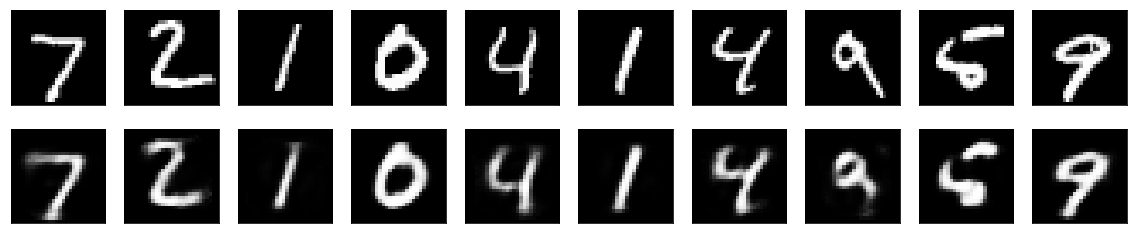

In [11]:
# visualize results
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()